Notebook di introduzione generale al package *pandas* di Python, che serve a gestire i dataframe

In [1]:
import pandas as pd     # importrazione in memoria del package pandas (già installato di default in Google Colab)
                        # non confondere la installazione di un package con la import: la prima installa SU DISCO e si fa una volta sola (alcuni package sono già pre-installati)
                        # la seconda carica il package IN MEMORIA e dunque va fatta ad ogni nuova esecuzione del notebook

In [3]:
df = pd.read_csv(filepath_or_buffer='Credit_ISLR.csv', sep=",")   # questa riga dà errore --> occorre fare l'upload del file csv nella session storage

Il file *Credit_ISLR.csv* è un famoso file bancario, che contiene 400 clienti di carte di credito descritti lungo una decina di attributi. E' un file simlato negli anni '90 ed è molto usato per imparare python e pandas.


In [4]:
df.head()    # le prime 5 righe

,Unnamed: 0,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [5]:
df.tail()     # le ultime 5 righe

,Unnamed: 0,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
395,396,396,12.096,4100,307,3,32,13,Male,No,Yes,Caucasian,560
396,397,397,13.364,3838,296,5,65,17,Male,No,No,African American,480
397,398,398,57.872,4171,321,5,67,12,Female,No,Yes,Caucasian,138
398,399,399,37.728,2525,192,1,44,13,Male,No,Yes,Caucasian,0
399,400,400,18.701,5524,415,5,64,7,Female,No,No,Asian,966


Rimuoviamo le colonne inutili:

In [6]:
df.drop(columns=['Unnamed: 0','ID'],inplace=True)  # in-place = True rende l'operazione di drop PERSISTENTE (in memoria)

In [7]:
df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [8]:
type(df)              # la classe dell'oggetto --> è un dataframe perchè è stato creato con la funzione 'pd.read_csv' di pandas

pandas.core.frame.DataFrame

**Cosa è un dataframe?**<br>
E' una TABELLA di righe e colonne **in memoria**. Non è la classica tabella SQL (su disco)

Ora un pò di analisi di questo dataset:

In [9]:
df.info()          # fornisce una serie di informazioni sul dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Income     400 non-null    float64
 1   Limit      400 non-null    int64  
 2   Rating     400 non-null    int64  
 3   Cards      400 non-null    int64  
 4   Age        400 non-null    int64  
 5   Education  400 non-null    int64  
 6   Gender     400 non-null    object 
 7   Student    400 non-null    object 
 8   Married    400 non-null    object 
 9   Ethnicity  400 non-null    object 
 10  Balance    400 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 34.5+ KB


'float64' è un numero a virgola  mobile in doppia precisione (cioè con i decimali e allocato su 64 bit).<br>
'int64' è un numero intero allocato su 64 bit<br>
'object' è una stringa alfanumerica


Posso ottenere alcune di queste info separatamente:

In [10]:
display(df.columns.tolist())
display(df.dtypes)
print('\n','numero di NA: ',df.isna().sum().sum().item(),'\n')
print('byte del size: ', df.size)



['Income',
 'Limit',
 'Rating',
 'Cards',
 'Age',
 'Education',
 'Gender',
 'Student',
 'Married',
 'Ethnicity',
 'Balance']

Income       float64
Limit          int64
Rating         int64
Cards          int64
Age            int64
Education      int64
Gender        object
Student       object
Married       object
Ethnicity     object
Balance        int64
dtype: object


 numero di NA:  0 

byte del size:  4400


In [11]:
df.describe()   # calcola le statistiche di base

,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000
std,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877
min,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000
50%,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000
75%,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000
max,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


In [12]:
round(df.describe(),2)

,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.00,400.00,400.00,400.00,400.00,400.00,400.00
mean,45.22,4735.60,354.94,2.96,55.67,13.45,520.02
std,35.24,2308.20,154.72,1.37,17.25,3.13,459.76
min,10.35,855.00,93.00,1.00,23.00,5.00,0.00
25%,21.01,3088.00,247.25,2.00,41.75,11.00,68.75
50%,33.12,4622.50,344.00,3.00,56.00,14.00,459.50
75%,57.47,5872.75,437.25,4.00,70.00,16.00,863.00
max,186.63,13913.00,982.00,9.00,98.00,20.00,1999.00


In [13]:
df['Income'].median()    # mediana molto più bassa della media

33.1155

<Axes: >

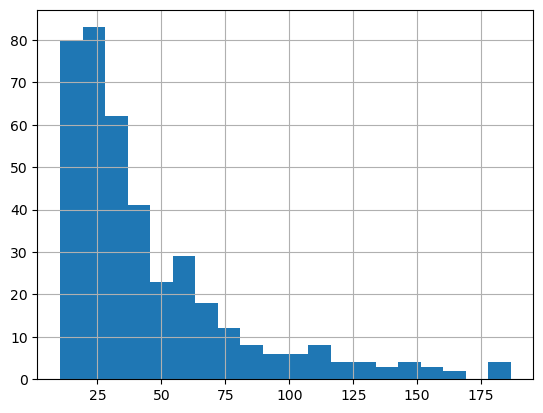

In [14]:
df['Income'].hist(bins=20)

In [15]:
print(df.shape)
print(df['Income'].shape)
print(type(df['Income']))

print(df[['Income']].shape)
print(type(df[['Income']]))

(400, 11)
(400,)
<class 'pandas.core.series.Series'>
(400, 1)
<class 'pandas.core.frame.DataFrame'>


<Axes: >

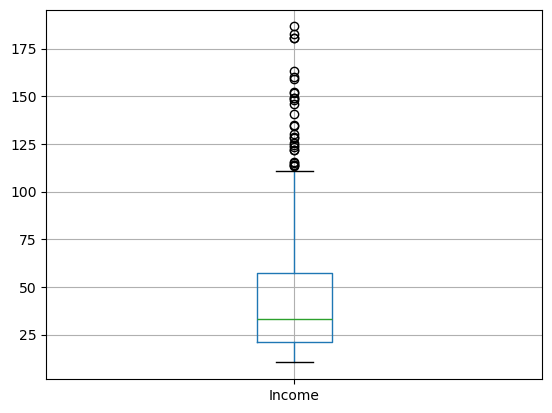

In [16]:
df[['Income']].boxplot()

Calcoliamo la fondamentale matrice di correlazione

In [17]:
df.corr()    # --> dà errore perchè le correlazioni sono calcolabili solo tra coppie di variabili numeriche

ValueError: could not convert string to float: ' Male'

In [18]:
df.select_dtypes('number')

,Income,Limit,Rating,Cards,Age,Education,Balance
0,14.891,3606,283,2,34,11,333
1,106.025,6645,483,3,82,15,903
2,104.593,7075,514,4,71,11,580
3,148.924,9504,681,3,36,11,964
4,55.882,4897,357,2,68,16,331
...,...,...,...,...,...,...,...
395,12.096,4100,307,3,32,13,560
396,13.364,3838,296,5,65,17,480
397,57.872,4171,321,5,67,12,138
398,37.728,2525,192,1,44,13,0


In [19]:
round(df.select_dtypes('number').corr(),2)

,Income,Limit,Rating,Cards,Age,Education,Balance
Income,1.00,0.79,0.79,-0.02,0.18,-0.03,0.46
Limit,0.79,1.00,1.00,0.01,0.10,-0.02,0.86
Rating,0.79,1.00,1.00,0.05,0.10,-0.03,0.86
Cards,-0.02,0.01,0.05,1.00,0.04,-0.05,0.09
Age,0.18,0.10,0.10,0.04,1.00,0.00,0.00
Education,-0.03,-0.02,-0.03,-0.05,0.00,1.00,-0.01
Balance,0.46,0.86,0.86,0.09,0.00,-0.01,1.00


Cosa è una **serie** in pandas?

In [20]:
s = pd.Series([1,2,3,4])

In [21]:
type(s)

pandas.core.series.Series

In [22]:
s.shape

(4,)

Le colonne di un dataframe sono 'serie'. In altri termini, un dataframe pandas è la somma di tante colonne:

In [23]:
type(df['Income'])

pandas.core.series.Series

dataframe e serie hanno molti metodi differenti (alcuni in comuni)

In [24]:
display(s.shape)
display(df.shape)

(4,)

(400, 11)

In [25]:
s.boxplot

AttributeError: 'Series' object has no attribute 'boxplot'

Rename dei nomi colonna

In [26]:
df.rename(columns={'Balance': 'Balance_card'}, inplace=True)
df

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance_card
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
...,...,...,...,...,...,...,...,...,...,...,...
395,12.096,4100,307,3,32,13,Male,No,Yes,Caucasian,560
396,13.364,3838,296,5,65,17,Male,No,No,African American,480
397,57.872,4171,321,5,67,12,Female,No,Yes,Caucasian,138
398,37.728,2525,192,1,44,13,Male,No,Yes,Caucasian,0


Campionamento casuale:

In [27]:
df.sample(n=10, random_state=100)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance_card
248,15.717,905,93,1,38,16,Male,Yes,Yes,Caucasian,0
318,18.951,1485,129,3,82,13,Female,No,No,Caucasian,0
173,14.887,4745,339,3,58,12,Male,No,Yes,African American,724
285,18.967,1626,156,2,41,11,Female,No,Yes,Asian,0
184,158.889,11589,805,1,62,17,Female,No,Yes,Caucasian,1448
235,10.503,2923,232,3,25,18,Female,No,Yes,African American,191
124,29.564,2529,192,1,30,12,Female,No,Yes,Caucasian,0
282,63.534,8100,581,2,50,17,Female,No,Yes,Caucasian,1298
151,35.864,4831,353,3,66,13,Female,No,Yes,Caucasian,534
169,27.330,6179,459,4,36,12,Female,No,Yes,Caucasian,1099


shuffling = rimescolamento (NON per serie temporali)

In [28]:
n = df.shape[0]    # il numero di righe del dataframe
df = df.sample(n,random_state=1000)   # il trucco è qua, il campionamento è fatto su TUTTE le righe, e quindi costituisce uno shuffling
display(df)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance_card
220,44.847,5765,437,3,53,13,Female,Yes,No,Asian,1246
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
230,33.214,5137,387,3,59,9,Male,No,No,African American,661
55,32.916,1786,154,2,60,8,Female,No,Yes,Asian,0
312,27.825,5227,386,6,63,11,Male,No,Yes,Caucasian,823
...,...,...,...,...,...,...,...,...,...,...,...
350,30.002,1561,155,4,70,13,Female,No,Yes,Caucasian,0
251,28.474,3202,267,5,66,12,Male,No,Yes,Caucasian,132
192,28.508,3933,287,4,56,14,Male,No,Yes,Asian,336
71,58.781,7402,538,2,81,12,Female,No,Yes,Asian,1103
